In [2]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [29]:
def plot_image(images):
    plt.figure(figsize=(30, 30))
    n_images = len(images)
    cols = 3
    rows = n_images//cols if n_images%cols==0 else (n_images//cols)+1
    for i in range(len(images)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow((images[i]))
        plt.title(f'{i}', fontsize=30)
        plt.axis("off")

def tensor2Image(image):
    m1,m2 = image.min(), image.max()
    image = (image - m1)/(m2 - m1)
    image = image * 255.0
    
    image = image.to(torch.uint8)[0]
    
    image_display = T.ToPILImage()(image)
    return image_display

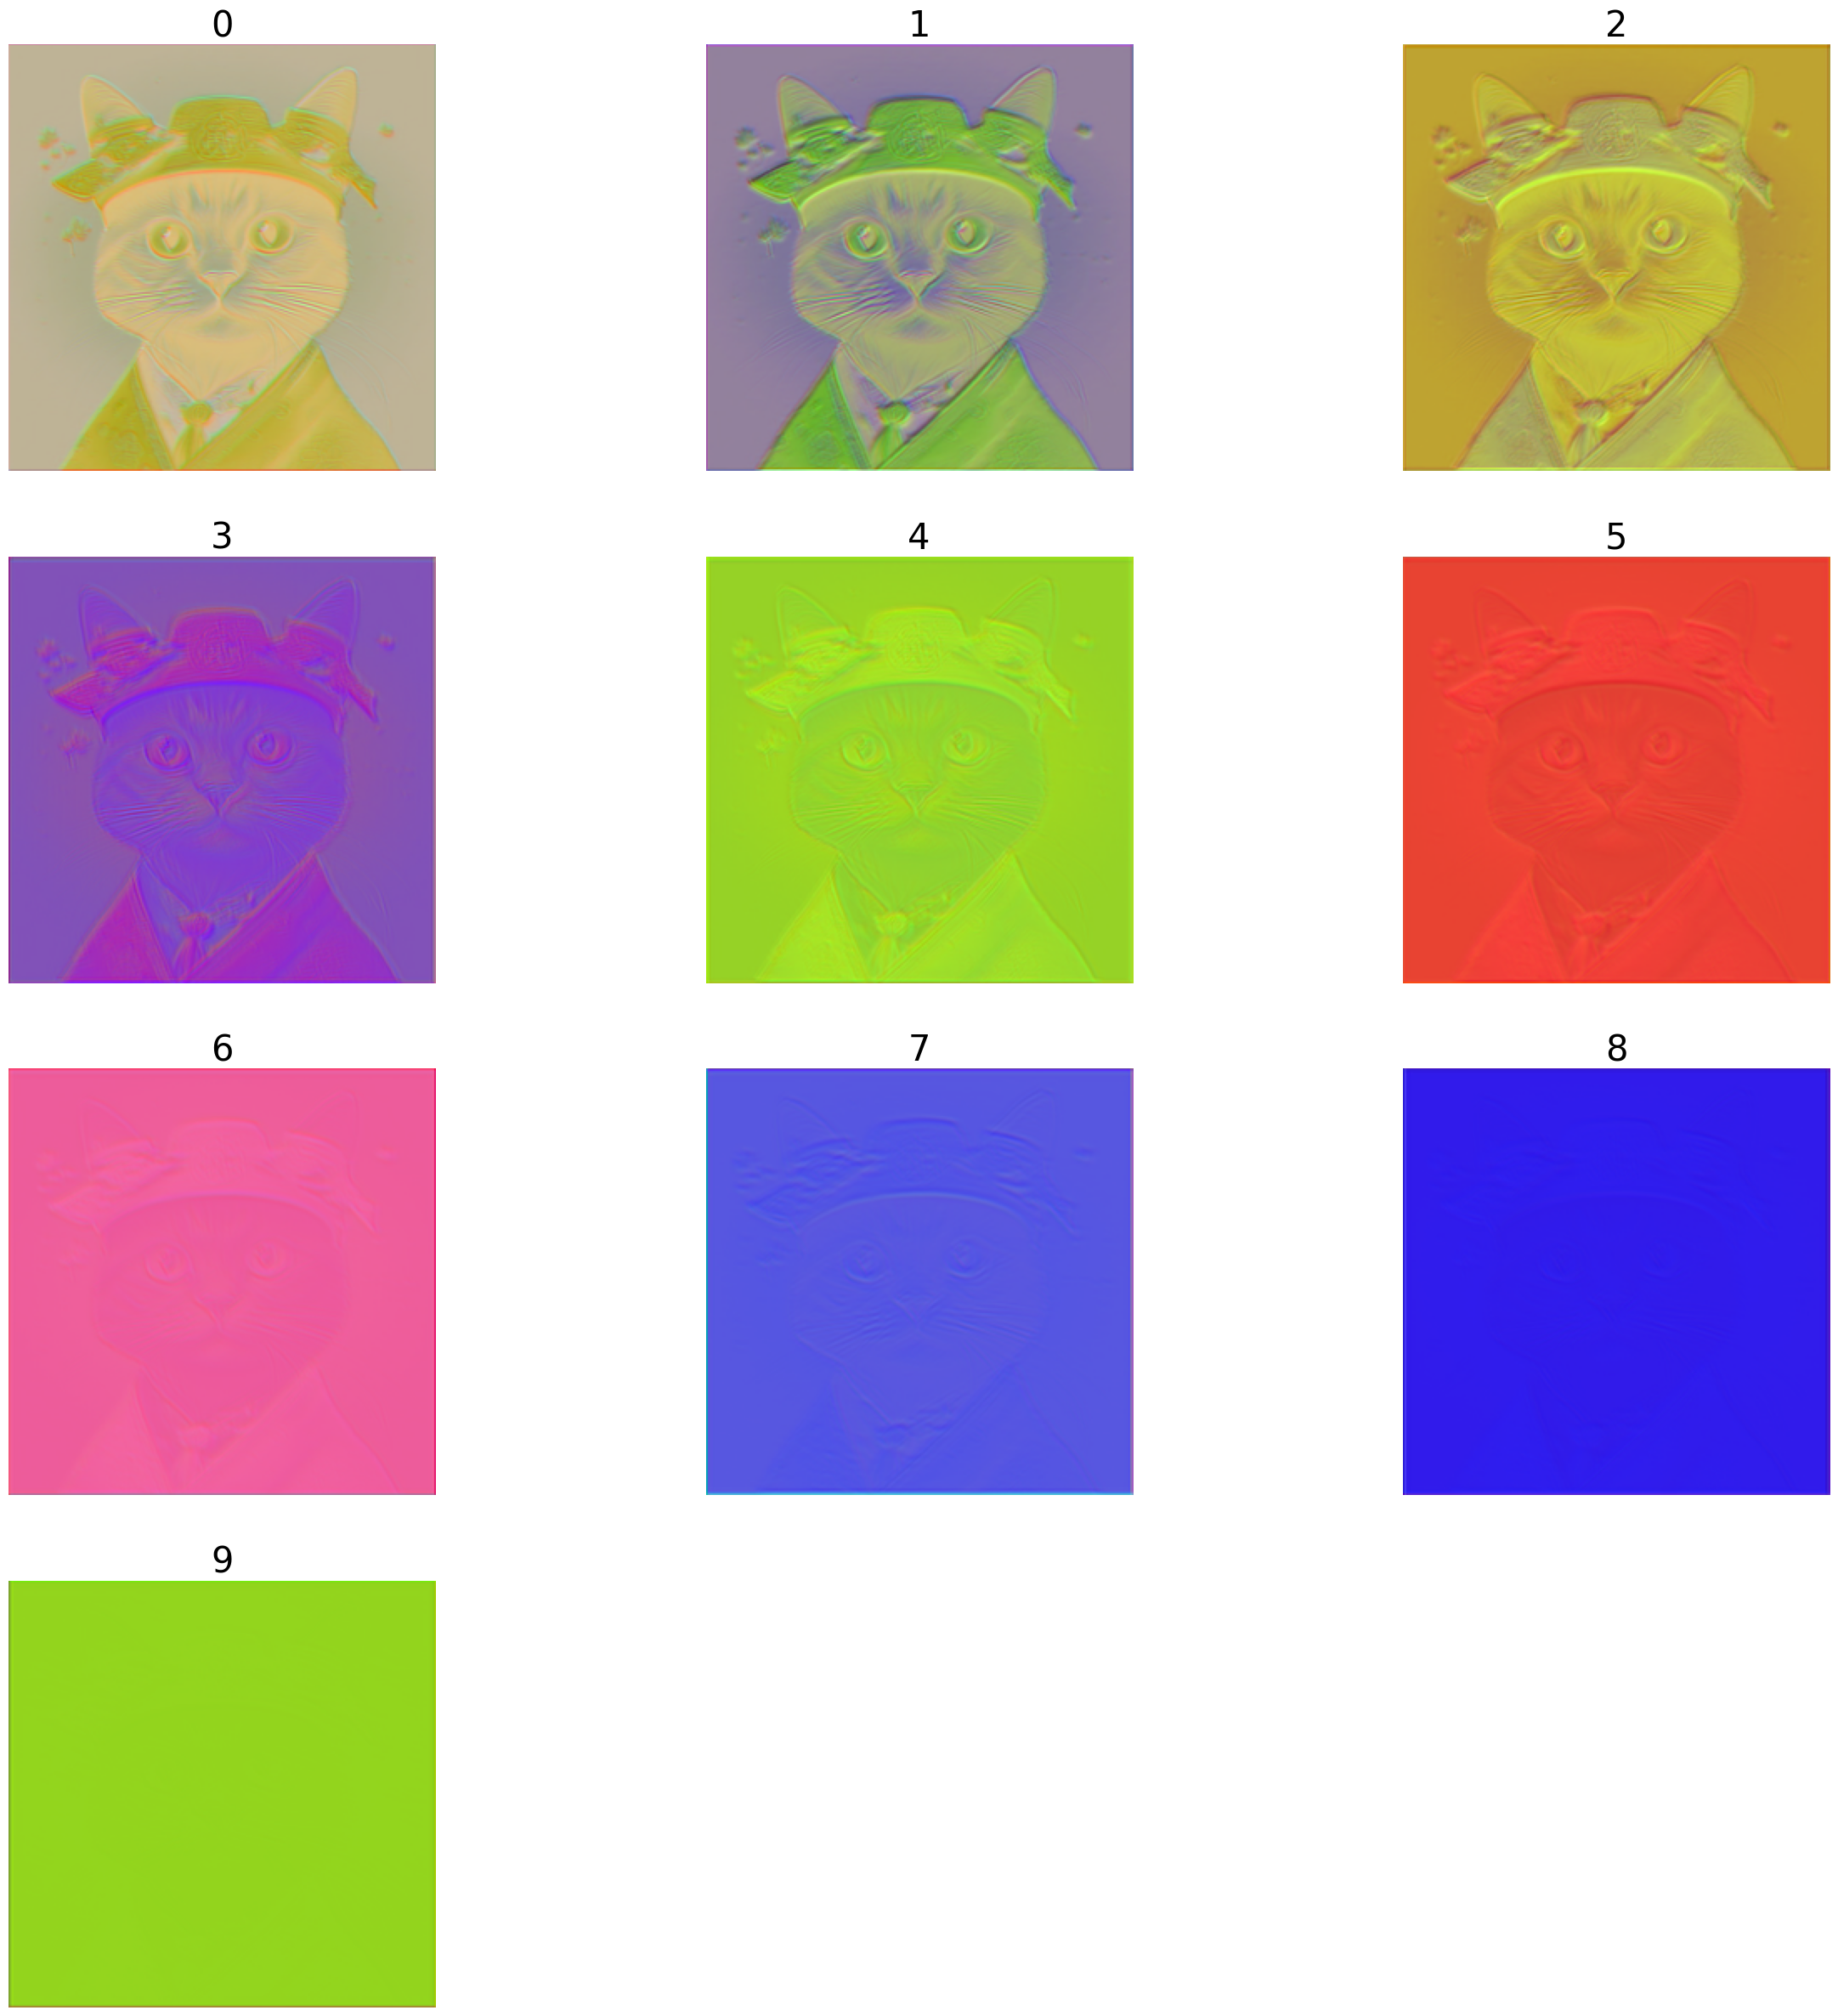

In [32]:
transform = T.Compose(
    [
        T.Resize((256,256)),
        T.ToTensor(),
        T.Normalize(mean=[1,1,1],std=[0.5,0.5,0.5]),
    ]
)
image = Image.open("medium.jpg")
image = transform(image).unsqueeze(0)
images = []
for i in range(10):
    orig_image = image
    conv = nn.Conv2d(3,3,kernel_size=3,padding=1)    
    image = conv(image)
    # image = image + orig_image
    # image = nn.BatchNorm2d(3)(image)
    # image = nn.ReLU()(image)
    images.append(tensor2Image(image).resize((256,256)))

plot_image(images)